# Fitbit Sleep Quality

Let's define the quality of sleep as the total minutes as sleep. According to Fitbit, a good sleep is determined by person's sleep duration and heartrate variability. Therefore, we must find a correlation between the two.
https://healthsolutions.fitbit.com/blog/track-sleep/

According to SLEEP FOUNDATION, a good sleep must includes
- Less than 30 minutes to get to sleep after get into the bed
- Wake up not more than once per night
- Sleep time is >= 85% time on bed

With these assumptions, we can label the sleep quality. Next, we have to determine sleep quality by person's daily activity.

In [473]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading
___

In [474]:
sleep_day = pd.read_csv('./data/fitbit_amazon/sleepDay_merged.csv')
activity_day = pd.read_csv('./data/fitbit_amazon/dailyActivity_merged.csv')

In [475]:
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [476]:
activity_day

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


# Data Exploration
___

## Labeling Y (Sleep Quality)

In [477]:
sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [478]:
sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay']).dt.date
activity_day['ActivityDate'] = pd.to_datetime(activity_day['ActivityDate']).dt.date

In [479]:
# loop through each row and return value determine sleep quality
# We do not have data about wake up frequency, so we will not use it
def get_sleep_quality(tot_minute_sleep, tot_minute_in_bed):
    MAX_TIME_TO_SLEEP = 30
    MAX_SLEEP_TIME_RATIO = 0.85

    exceeds_time_to_sleep = tot_minute_in_bed - tot_minute_sleep > MAX_TIME_TO_SLEEP
    lack_sleep_ratio = tot_minute_sleep/tot_minute_in_bed < MAX_SLEEP_TIME_RATIO

    
    # if exceeds_time_to_sleep or exceeds_wake_up_freq or lack_sleep_ratio:
    if not exceeds_time_to_sleep and not lack_sleep_ratio:
        return 1 # Good
    else:
        return 0 # Bad
    

for index, row in sleep_day.iterrows():
    sleep_day.loc[index, 'SleepQuality'] = get_sleep_quality(row['TotalMinutesAsleep'], row['TotalTimeInBed'])

sleep_day.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepQuality
0,1503960366,2016-04-12,1,327,346,1.0
1,1503960366,2016-04-13,2,384,407,1.0
2,1503960366,2016-04-15,1,412,442,1.0
3,1503960366,2016-04-16,2,340,367,1.0
4,1503960366,2016-04-17,1,700,712,1.0


<AxesSubplot: ylabel='SleepQuality'>

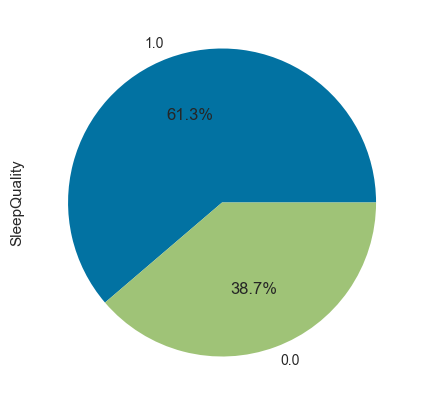

In [480]:
sleep_day['SleepQuality'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5))

In [481]:
activity_day.rename(columns={'ActivityDate': 'Date'}, inplace=True)
sleep_day.rename(columns={'SleepDay': 'Date'}, inplace=True)

In [482]:
activity_day.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [483]:
sleep_day.head()

,Id,Date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepQuality
0,1503960366,2016-04-12,1,327,346,1.0
1,1503960366,2016-04-13,2,384,407,1.0
2,1503960366,2016-04-15,1,412,442,1.0
3,1503960366,2016-04-16,2,340,367,1.0
4,1503960366,2016-04-17,1,700,712,1.0


In [484]:
print(len(activity_day))
print(len(sleep_day))

940
413


In [485]:
df = pd.merge(activity_day, sleep_day, on=['Id', 'Date'], how='inner')
df

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,SleepQuality
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1,327,346,1.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2,384,407,1.0
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,1,412,442,1.0
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,2,340,367,1.0
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,1,700,712,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,8792009665,2016-04-30,7174,4.59,4.59,0.0,0.33,0.36,3.91,0.0,10,20,301,749,2896,1,343,360,1.0
409,8792009665,2016-05-01,1619,1.04,1.04,0.0,0.00,0.00,1.04,0.0,0,0,79,834,1962,1,503,527,1.0
410,8792009665,2016-05-02,1831,1.17,1.17,0.0,0.00,0.00,1.17,0.0,0,0,101,916,2015,1,415,423,1.0
411,8792009665,2016-05-03,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297,1,516,545,1.0


In [486]:
413/len(activity_day)

0.43936170212765957

We can see that we only have 413 rows left. We only have 43.94% of labeled data left. Thus, we should conduct semi-supervised learning to predict SleepQuality and use the model to label SleepQuality of each missing labeled value.

In [487]:
df.drop(['TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed'], axis=1, inplace=True)

# Data Preprocessing
___

array([[<AxesSubplot: title={'center': 'Id'}>,
        <AxesSubplot: title={'center': 'TotalSteps'}>,
        <AxesSubplot: title={'center': 'TotalDistance'}>,
        <AxesSubplot: title={'center': 'TrackerDistance'}>],
       [<AxesSubplot: title={'center': 'LoggedActivitiesDistance'}>,
        <AxesSubplot: title={'center': 'VeryActiveDistance'}>,
        <AxesSubplot: title={'center': 'ModeratelyActiveDistance'}>,
        <AxesSubplot: title={'center': 'LightActiveDistance'}>],
       [<AxesSubplot: title={'center': 'SedentaryActiveDistance'}>,
        <AxesSubplot: title={'center': 'VeryActiveMinutes'}>,
        <AxesSubplot: title={'center': 'FairlyActiveMinutes'}>,
        <AxesSubplot: title={'center': 'LightlyActiveMinutes'}>],
       [<AxesSubplot: title={'center': 'SedentaryMinutes'}>,
        <AxesSubplot: title={'center': 'Calories'}>,
        <AxesSubplot: title={'center': 'SleepQuality'}>, <AxesSubplot: >]],
      dtype=object)

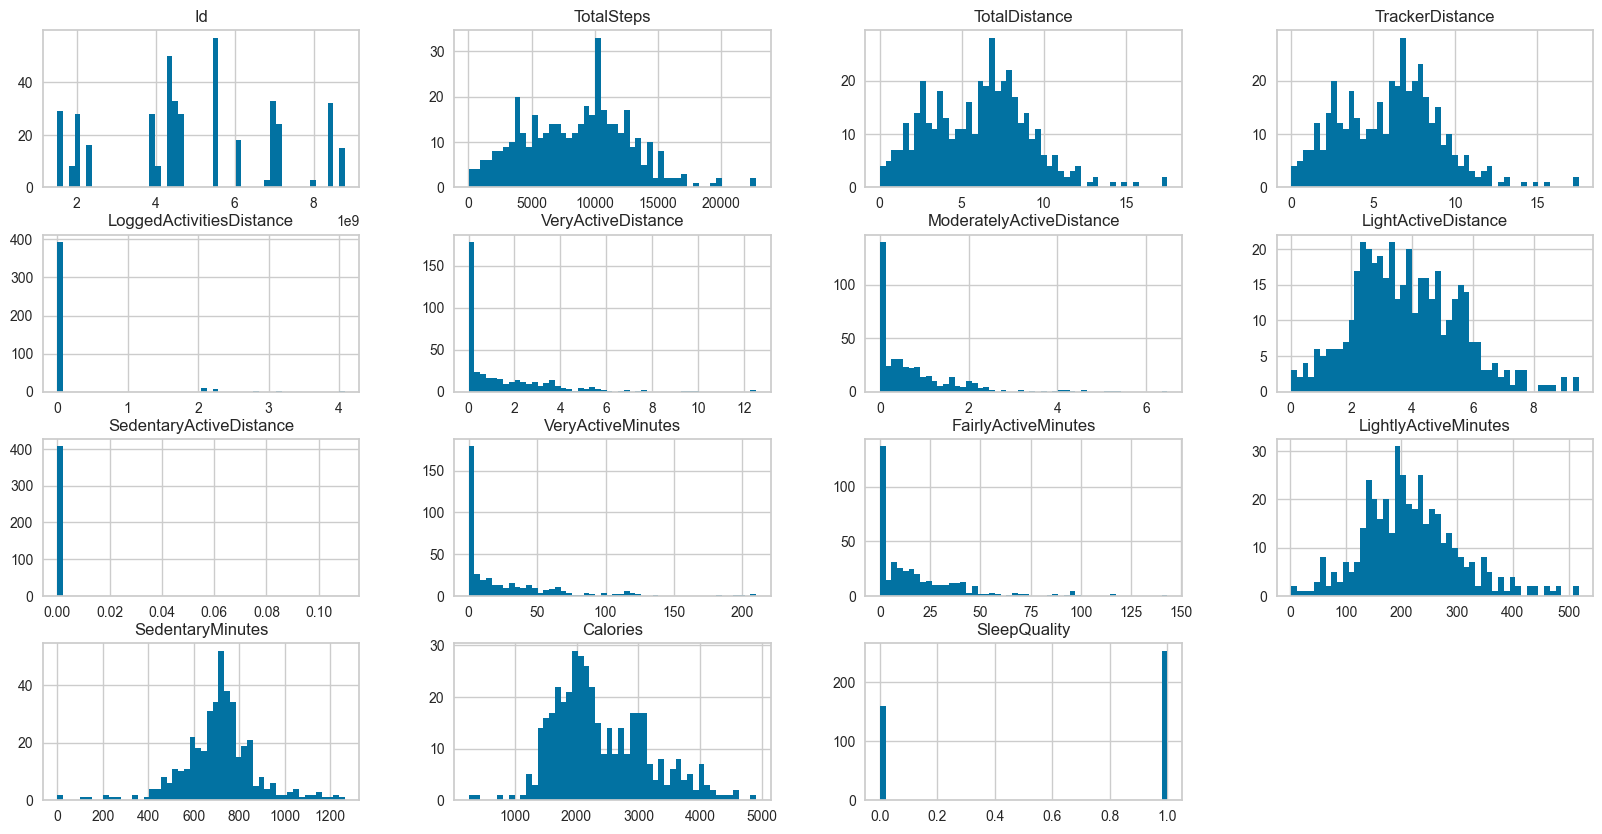

In [488]:
df.hist(bins=50)

In [489]:
df.columns

Index(['Id', 'Date', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories', 'SleepQuality'],
      dtype='object')

In [490]:
from sklearn.preprocessing import MinMaxScaler

target = ['TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']
scaler = MinMaxScaler()

df_transformed = df.copy()
df_transformed.drop(['Id', 'Date', 'SleepQuality'], axis=1, inplace=True)
df_transformed = scaler.fit_transform(df_transformed)
df_transformed = pd.DataFrame(df_transformed, columns=target)
df_transformed['SleepQuality'] = df['SleepQuality']
df_transformed.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,SleepQuality
0,0.577726,0.484313,0.484313,0.0,0.149920,0.084877,0.638860,0.0,0.119048,0.090909,0.631783,0.575494,0.372173,1.0
1,0.471059,0.397034,0.397034,0.0,0.125199,0.106481,0.496304,0.0,0.100000,0.132867,0.416667,0.613439,0.331682,1.0
2,0.428295,0.357673,0.357673,0.0,0.170654,0.194444,0.297782,0.0,0.138095,0.237762,0.401163,0.573913,0.320482,1.0
3,0.556059,0.464917,0.464917,0.0,0.216108,0.063272,0.531151,0.0,0.171429,0.069930,0.424419,0.611067,0.345897,1.0
4,0.425790,0.369082,0.369082,0.0,0.254386,0.120370,0.263992,0.0,0.180952,0.139860,0.313953,0.426087,0.316821,1.0


<AxesSubplot: ylabel='SleepQuality'>

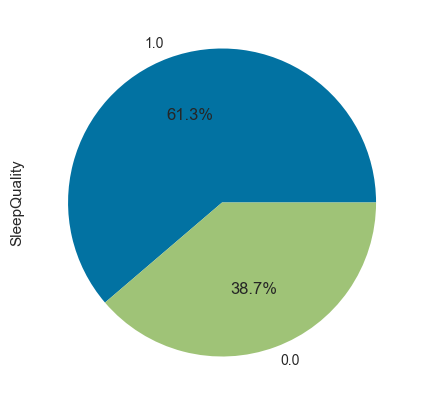

In [491]:
df_transformed['SleepQuality'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5))

<AxesSubplot: >

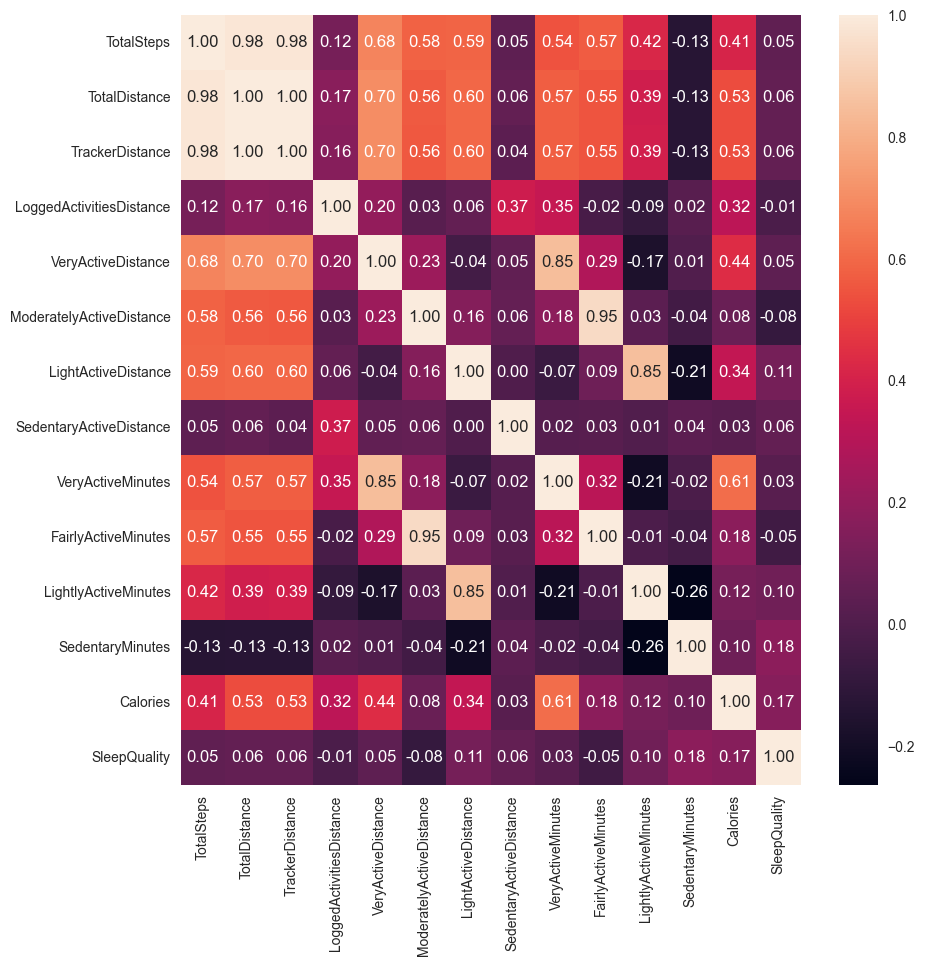

In [492]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_transformed.corr(), annot=True, fmt='.2f')

Even though the Y value does not have high intercollinearity, but many variables have high intercollinearity among each other (which can be seen by corr value within a near range with each other). We could remove these values.

In [493]:
# NOTE: Dropping these columns and not leave the same result
df_transformed.drop(['TotalSteps', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveMinutes','FairlyActiveMinutes', 'LightlyActiveMinutes'], axis=1, inplace=True)

<AxesSubplot: >

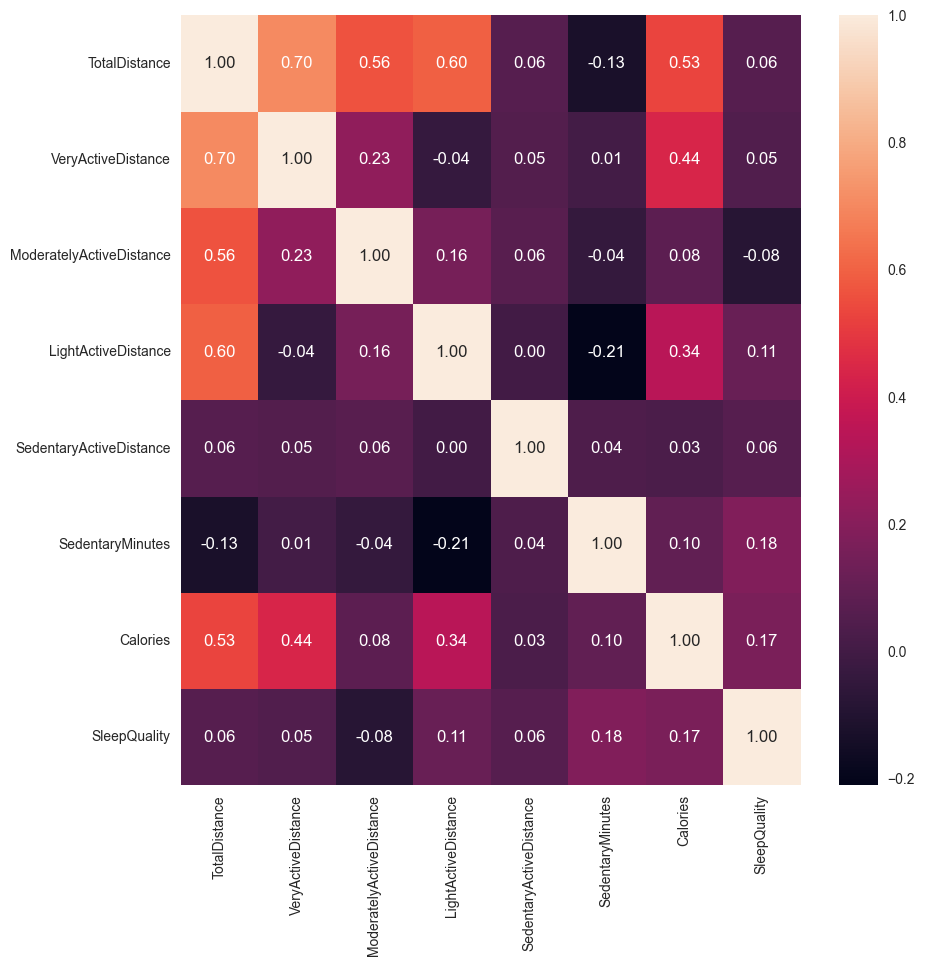

In [494]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_transformed.corr(), annot=True, fmt='.2f')

Set Y=SleepQuality
From the heatmap, we can see that there are not much intercollinearity in this dataset. Thus, we don't need to remove any feature.

In [495]:
from sklearn.model_selection import train_test_split

df_transformed.drop(['SleepQuality'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_transformed, df[['SleepQuality']], test_size=0.2, shuffle=True, random_state=100)

In [496]:
X_train.head()

,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,SedentaryMinutes,Calories
271,0.671420,0.610048,0.331790,0.208025,0.0,0.335968,0.890588
389,0.355391,0.124402,0.075617,0.442450,0.0,0.537549,0.614473
69,0.205933,0.006380,0.043210,0.343189,0.0,0.401581,0.349989
324,0.379350,0.178628,0.117284,0.386484,0.0,0.577866,0.375835
199,0.246435,0.143541,0.077160,0.212249,0.0,0.805534,0.518846


In [497]:
y_train.value_counts()

SleepQuality
1.0             201
0.0             129
dtype: int64

array([[<AxesSubplot: title={'center': 'TotalDistance'}>,
        <AxesSubplot: title={'center': 'VeryActiveDistance'}>,
        <AxesSubplot: title={'center': 'ModeratelyActiveDistance'}>],
       [<AxesSubplot: title={'center': 'LightActiveDistance'}>,
        <AxesSubplot: title={'center': 'SedentaryActiveDistance'}>,
        <AxesSubplot: title={'center': 'SedentaryMinutes'}>],
       [<AxesSubplot: title={'center': 'Calories'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

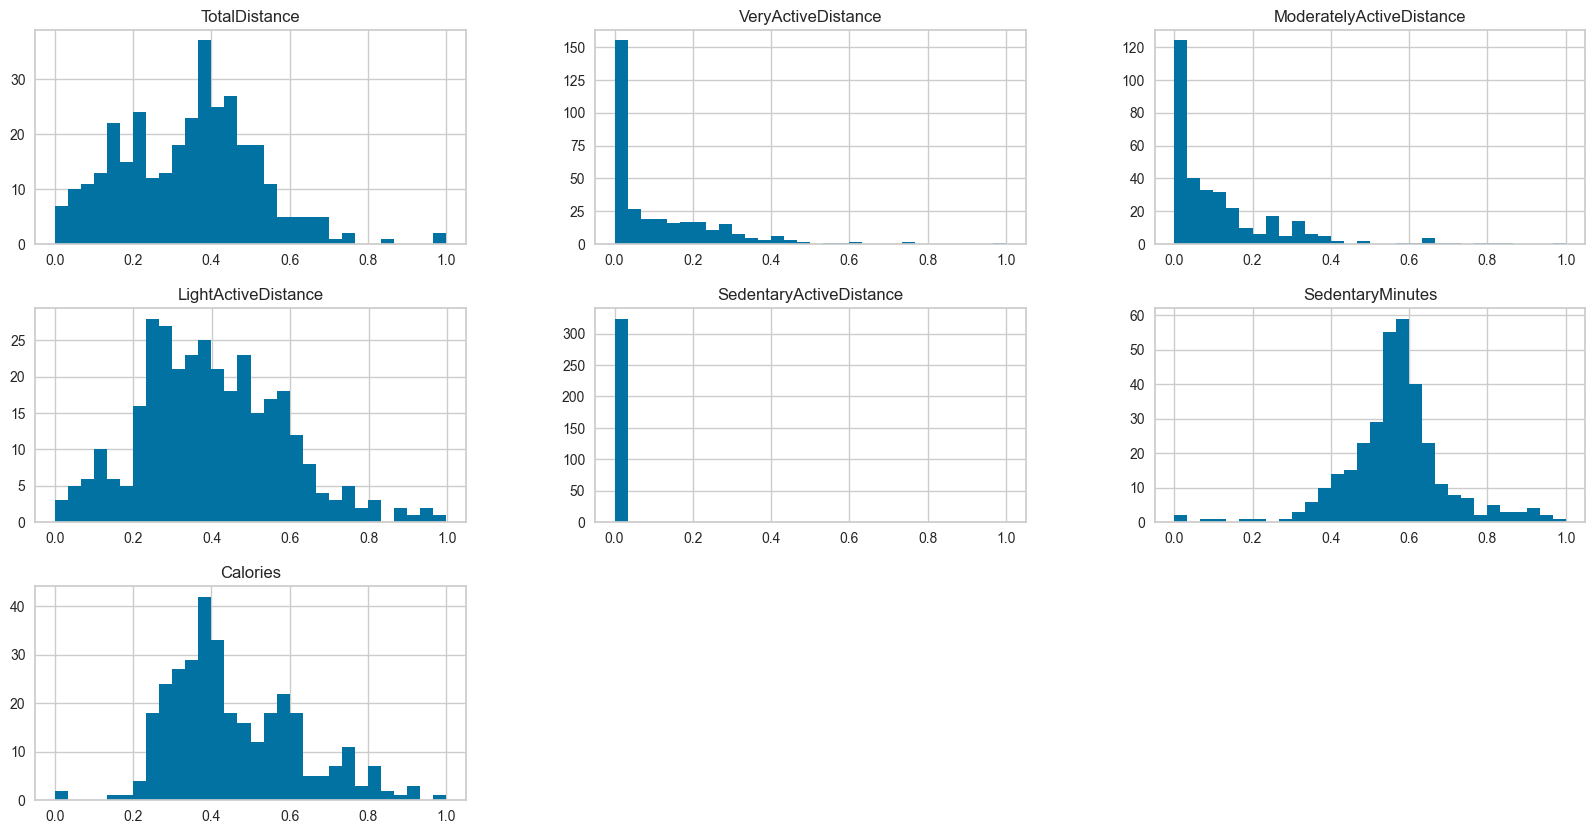

In [498]:
plt.rcParams['figure.figsize'] = (20, 10)
X_train.hist(bins=30)

# Model
___

In [499]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression()
logr = logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)

/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [500]:
logr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Evaluation
___

Classification Report: 
               precision    recall  f1-score   support

        Good       0.71      0.16      0.26        31
         Bad       0.66      0.96      0.78        52

    accuracy                           0.66        83
   macro avg       0.69      0.56      0.52        83
weighted avg       0.68      0.66      0.59        83
 

Accuracy on train:   0.664 

Accuracy on test:  0.663 



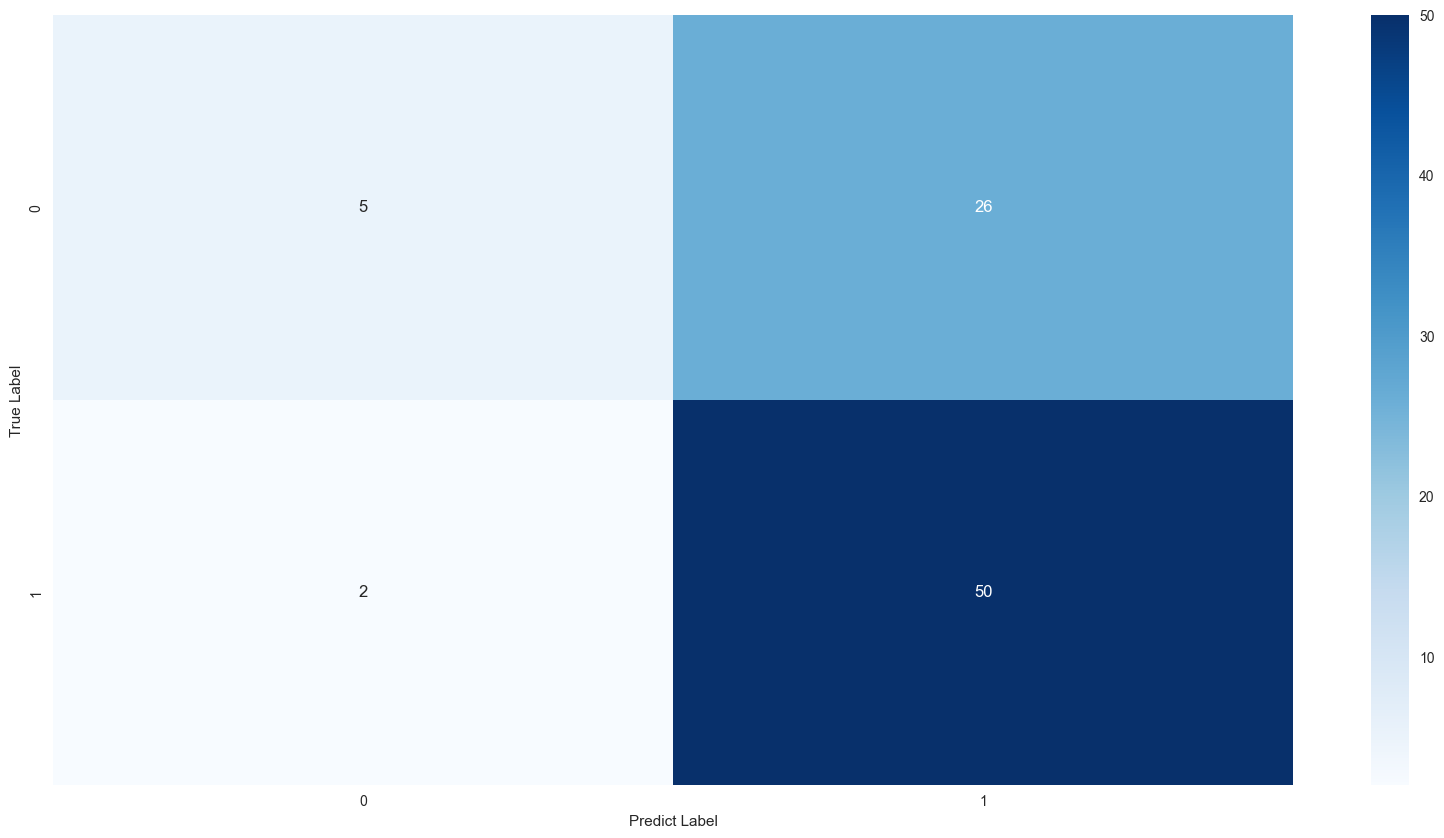

In [501]:
from sklearn import metrics

target_names = ['Good', 'Bad']

print("Classification Report: \n", metrics.classification_report(y_test,y_pred,target_names=target_names),'\n')
print("Accuracy on train:  ",logr.score(X_train,y_train).round(3),'\n')
print("Accuracy on test: ",logr.score(X_test,y_test).round(3),'\n')
cf=metrics.confusion_matrix(y_test,y_pred).round(3)
sns.heatmap(cf,annot=True,cmap='Blues')
plt.ylabel("True Label")
plt.xlabel("Predict Label")
plt.show()

In [502]:
logr.intercept_

array([-1.29018338])

In [503]:
logr.coef_

array([[-0.0508113 ,  0.29804217, -1.07106495,  0.79336421,  0.60342631,
         1.86220524,  1.051055  ]])

In [504]:
pred_prob = pd.DataFrame(logr.predict_proba(X_test))
metrics.roc_auc_score(y_test,pred_prob[0],multi_class='ovr')

0.3784119106699752

/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


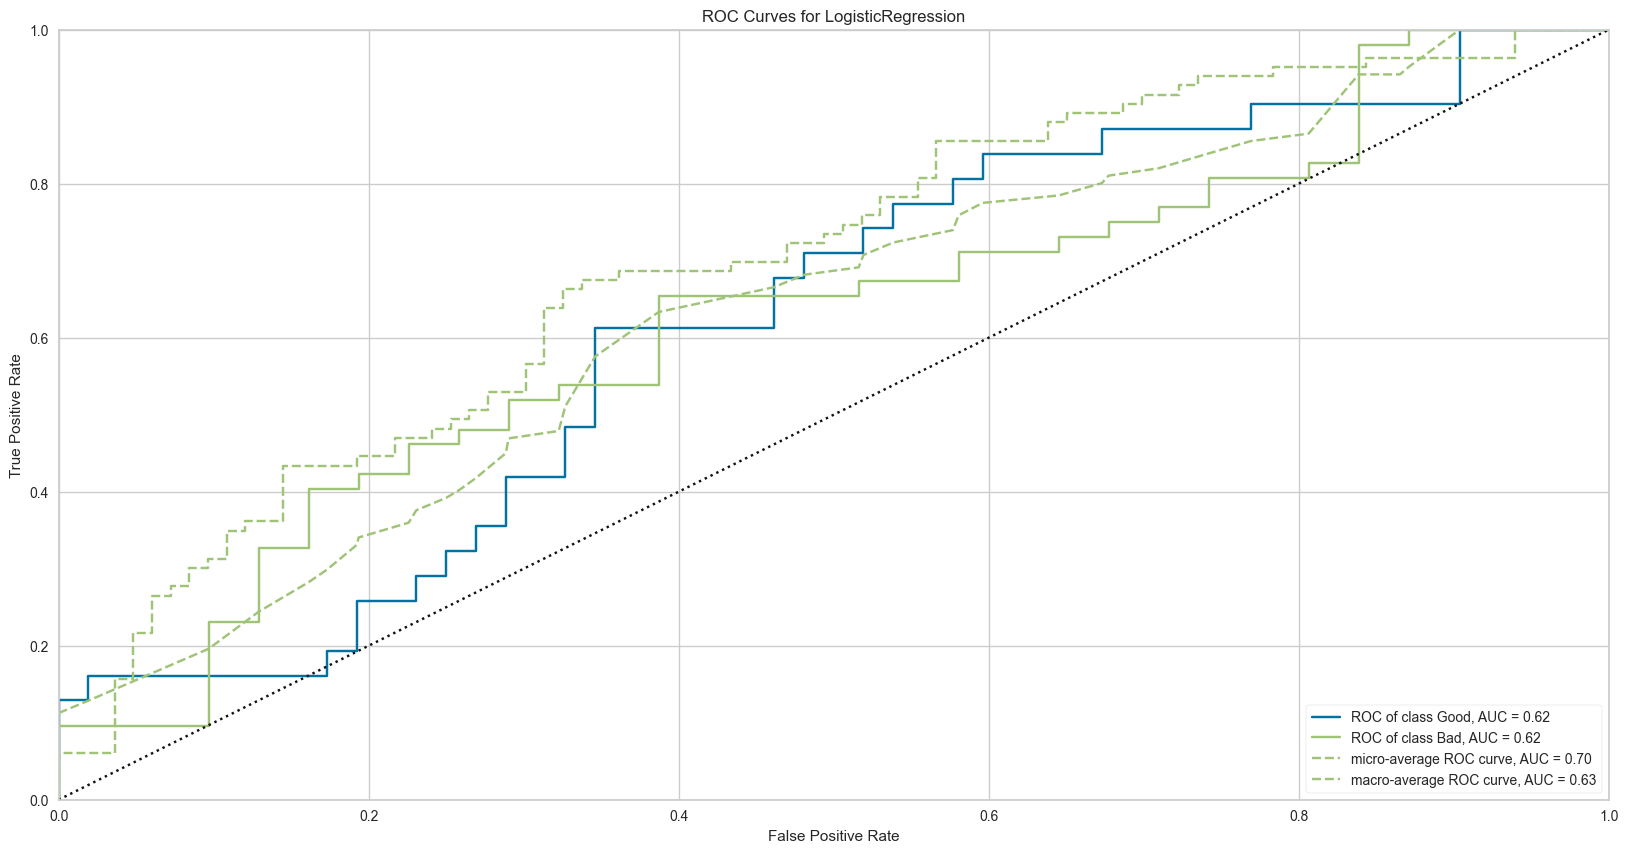

<AxesSubplot: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [505]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(logr, classes=target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()   

In [506]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, precision_score
  
  
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1_score = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_pred, average='macro')
cfm = confusion_matrix(y_test, y_pred).ravel()

print('Accuracy= ', accuracy)
print('Precision= ', precision)
print('Recall= ', recall)
print('F1 score= ', f1_score)
print('AUC= ', auc)
print('Confusion matrix= ', cfm)

Accuracy=  0.6626506024096386
Precision=  0.6578947368421053
Recall=  0.9615384615384616
F1 score=  0.78125
AUC=  0.5614143920595533
Confusion matrix=  [ 5 26  2 50]


As in this case, we would want to focus mostly on the precision since we want to spot a good quality of sleep. With this value of accuracy, it's a unsatisfactory value since it's a little larger than guessing (50%) but it could get improved with a larger dataset. Therefore, we could expand the number of records.

In [507]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = range(1, 11)

cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]

/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when

In [508]:
print(f"Best K value: {best_k-1}")

Best K value: 6


In [509]:
cv_scores

[0.5969696969696969,
 0.5545454545454545,
 0.6060606060606062,
 0.5696969696969697,
 0.6151515151515151,
 0.603030303030303,
 0.6545454545454547,
 0.6333333333333334,
 0.6484848484848487,
 0.6393939393939395]

In [510]:
# use K=6 since it yields the best score

knn = KNeighborsClassifier(n_neighbors=6)
y_pred = knn.fit(X_train, y_train).predict(X_test)

print("Classification Report: \n", metrics.classification_report(y_test, y_pred, digits=3),'\n')
print("Accuracy on train:  ", knn.score(X_train, y_train).round(3),'\n')
print("Accuracy on test: ", knn.score(X_test, y_test).round(3),'\n')

Classification Report: 
               precision    recall  f1-score   support

         0.0      0.611     0.710     0.657        31
         1.0      0.809     0.731     0.768        52

    accuracy                          0.723        83
   macro avg      0.710     0.720     0.712        83
weighted avg      0.735     0.723     0.726        83
 

Accuracy on train:   0.748 

Accuracy on test:  0.723 



/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [511]:
from sklearn.metrics import confusion_matrix, recall_score, f1_score, roc_auc_score, accuracy_score, precision_score
  
  
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1_score = f1_score(y_test, y_pred, average='binary')
auc = roc_auc_score(y_test, y_pred, average='macro')
cfm = confusion_matrix(y_test, y_pred).ravel()

print('Accuracy= ', accuracy)
print('Precision= ', precision)
print('Recall= ', recall)
print('F1 score= ', f1_score)
print('AUC= ', auc)
print('Confusion matrix= ', cfm)

Accuracy=  0.7228915662650602
Precision=  0.8085106382978723
Recall=  0.7307692307692307
F1 score=  0.7676767676767676
AUC=  0.7202233250620348
Confusion matrix=  [22  9 14 38]


/Users/chuwong/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


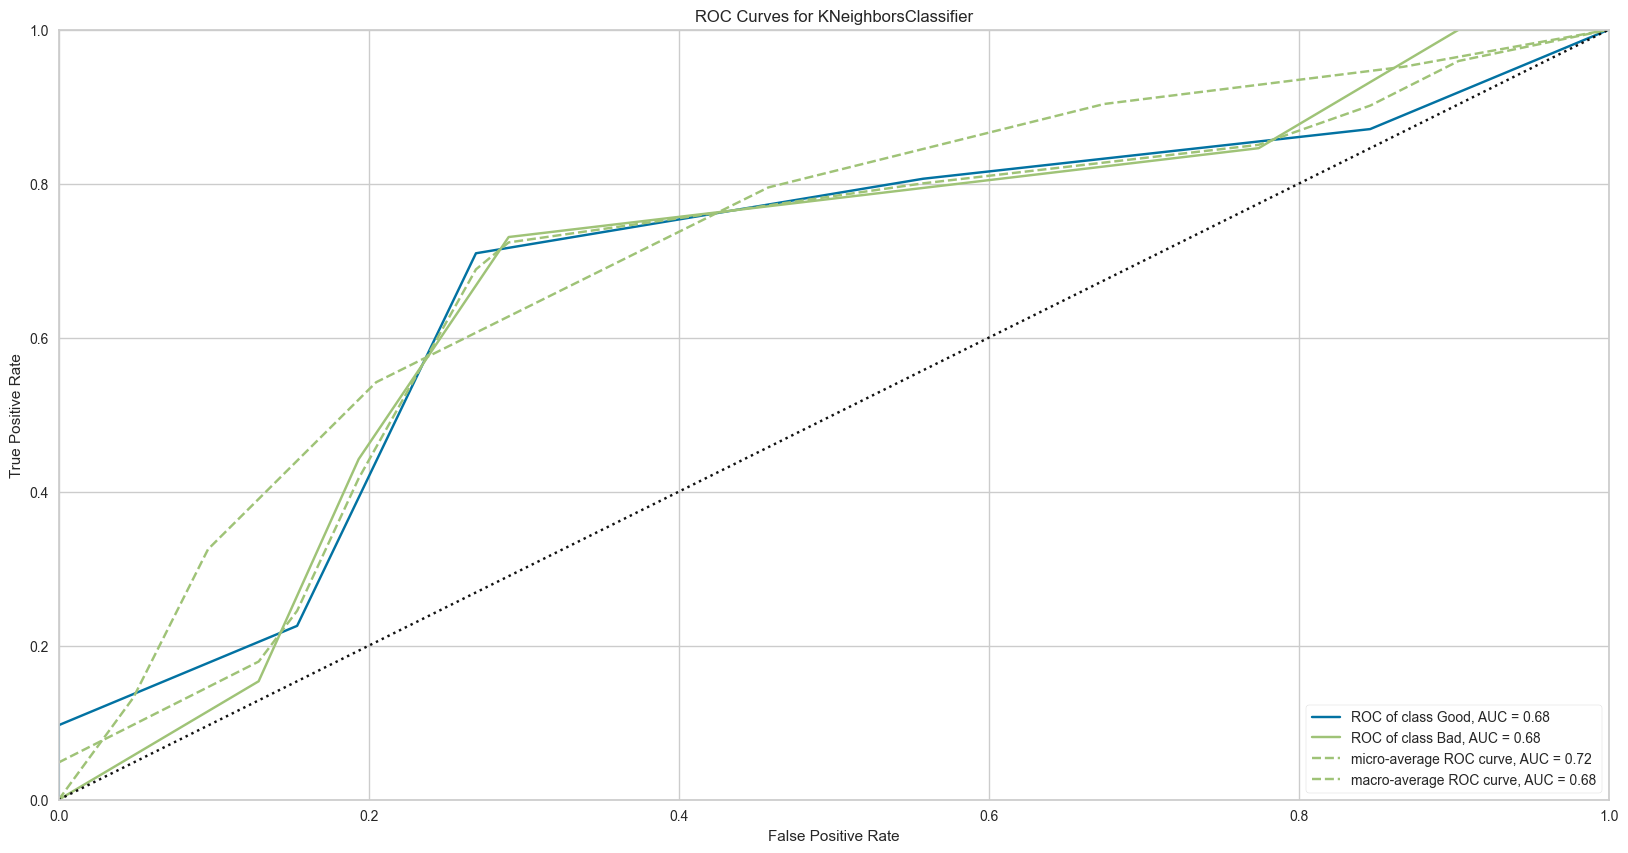

<AxesSubplot: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [512]:
from yellowbrick.classifier import ROCAUC
visualizer = ROCAUC(knn, classes=target_names)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()